In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 5.0MB/s 
     |████████████████████████████████| 9.5MB 35.1MB/s 
     |████████████████████████████████| 2.1MB 45.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


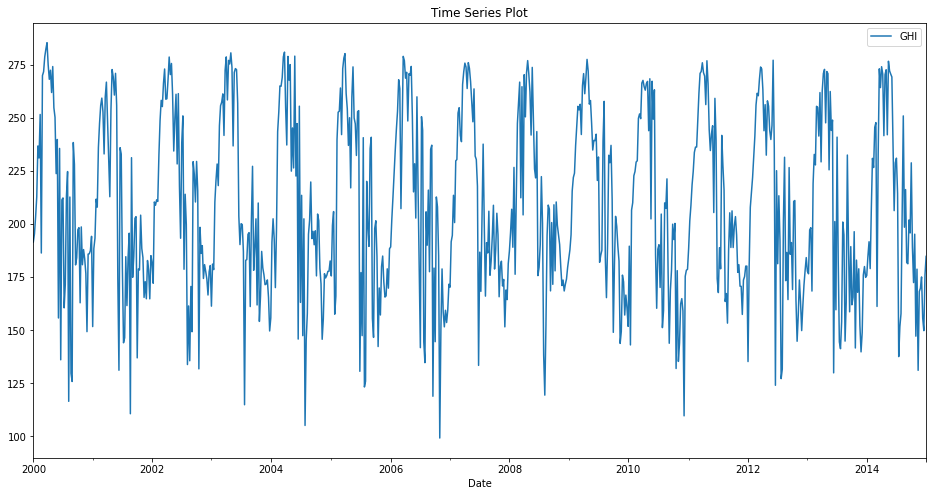

In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('W-FRI',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

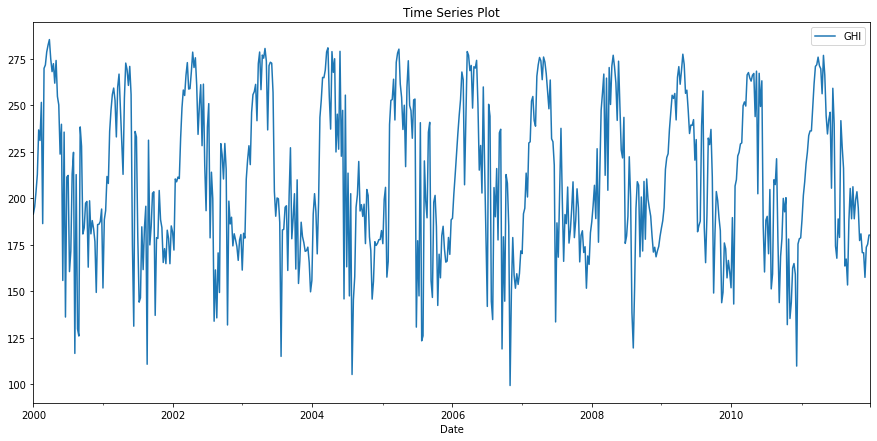

In [9]:
y[:'2011'].plot(figsize=[15,7],title='Time Series Plot')

In [10]:
X_train=y[:'2011']
X_test=y['2012':]

In [11]:
X_test

,GHI
Date,
2012-01-06,135.242857
2012-01-13,180.014286
2012-01-20,207.914286
2012-01-27,215.042857
2012-02-03,221.971429
...,...
2014-12-05,175.114286
2014-12-12,155.771429
2014-12-19,149.800000


In [12]:
np.any(np.isnan(X_train))

False

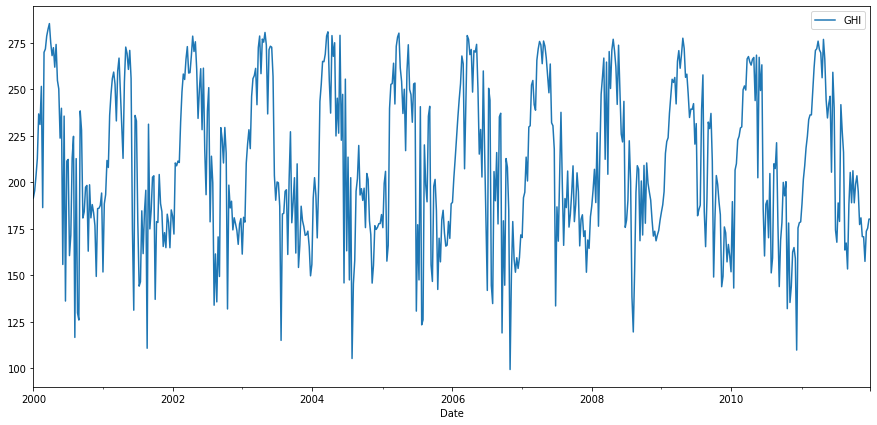

In [13]:
X_train.plot(figsize=(15,7))

In [14]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=5977.403, Time=2.55 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=5731.108, Time=6.74 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=29.34 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=5871.016, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=55.23 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=37.36 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=5854.909, Time=5.70 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=52.31 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=19.78 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=5733.105, Time=24.36 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 234.065 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2862.554
Date:                            Thu, 29 Apr 2021   AIC                           5731.108
Time:                                    20:09:31   BIC                           5744.161
Sample:                                         0   HQIC                          5736.200
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4443      0.031    -14.516      0.000      -0.504      -0.384
ar.S.L52      -0.5016      0.029    -17.562      0.000      -0.558      -0.446
sigma2      1245.2701     55.668     22.370      0.000    1136.163    1354.377
===================================================================================
Ljung-Box (L1) (Q):                   8.08   Jarque-Bera (JB):                63.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [16]:
X_test.shape

(157, 1)

In [17]:
pred=stepwise_model.predict(n_periods=157)

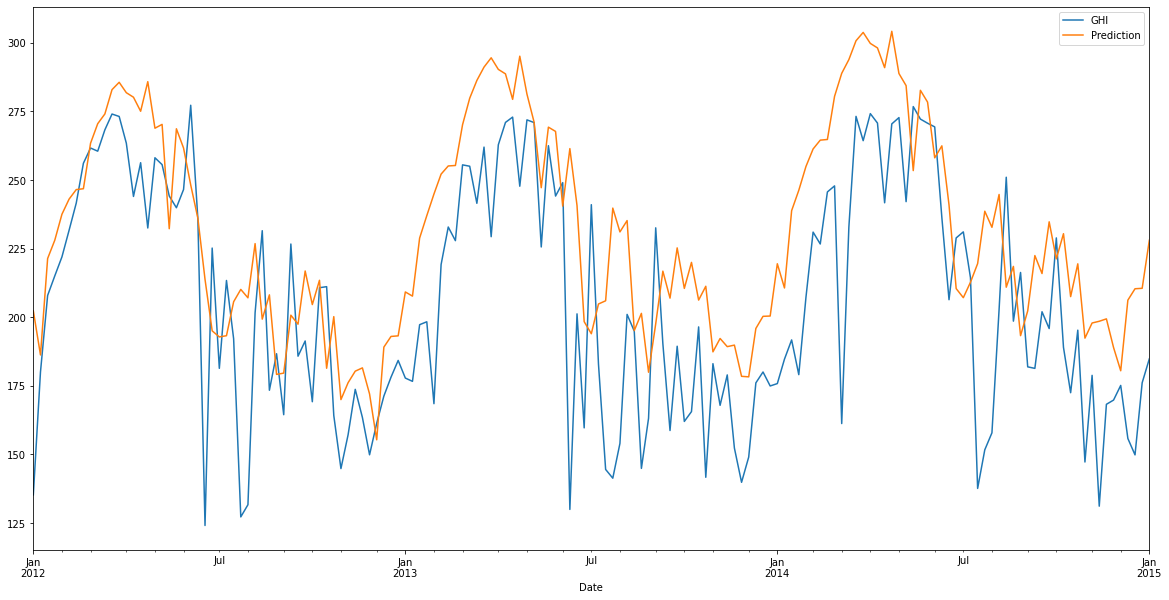

In [18]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

ValueError: ignored

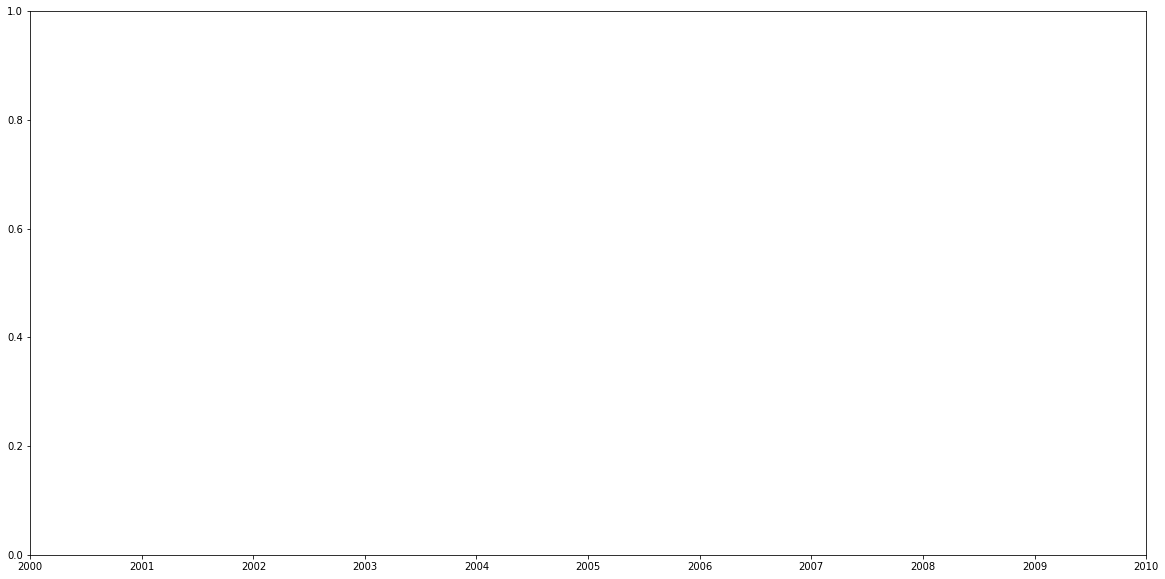

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/MLP_monthly.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')

plt.figure(figsize = (20,10))
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

0.172889584156576

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)

38.87734863196858

In [ ]:
pred.to_csv('')

,Prediction
Date,
2012-01-06,530.767035
2012-01-13,522.866295
2012-01-20,582.146054
2012-01-27,592.679164
2012-02-03,628.541958
...,...
2014-12-05,496.329418
2014-12-12,503.458449
2014-12-19,542.806504
